# Predicting Check-ins of Foursquare Users in Tokyo

## 4 - Machine Learning

### Import libraries

In [1]:
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
sns.set_context("poster")
rcParams['figure.figsize'] = (12.5, 11)
rcParams['figure.dpi'] = 250

### Load engineered features

In [3]:
df = pd.read_csv('df_afterwrangling.csv',
                 index_col=0,
                 parse_dates=[0],
                 date_parser=pd.to_datetime,
                 infer_datetime_format=True)

In [4]:
df_creatures_of_habit = pd.read_csv('df_creatures_of_habit.csv',
                                    index_col=0,
                                    parse_dates=[0],
                                    date_parser=pd.to_datetime,
                                    infer_datetime_format=True
                                    )
df_irregular_creatures_of_habit = pd.read_csv('df_irregular_creatures_of_habit.csv',
                                              index_col=0,
                                              parse_dates=[0],
                                              date_parser=pd.to_datetime,
                                              infer_datetime_format=True
                                              )

In [5]:
df_creatures_of_habit.tail()

,userid_time_place_0,userid_time_place_1,userid_time_place_2,userid_time_place_3,userid_time_place_4,userid_time_place_5,userid_time_place_6,userid_time_place_7,userid_time_place_8,userid_time_place_9,...,userid_time_place_237,userid_time_place_238,userid_time_place_239,userid_time_place_240,userid_time_place_241,userid_time_place_242,userid_time_place_243,userid_time_place_244,userid_time_place_245,userid_time_place_246
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-02-16 11:34:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-16 11:34:53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-16 11:34:55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-16 11:35:17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-16 11:35:29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_irregular_creatures_of_habit.tail()

,userid_place_0,userid_place_1,userid_place_2,userid_place_3,userid_place_4,userid_place_5,userid_place_6,userid_place_7,userid_place_8,userid_place_9,...,userid_place_237,userid_place_238,userid_place_239,userid_place_240,userid_place_241,userid_place_242,userid_place_243,userid_place_244,userid_place_245,userid_place_246
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-02-16 11:34:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-16 11:34:53,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-16 11:34:55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-16 11:35:17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-16 11:35:29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Concatenate all features into one DataFrame

In [7]:
df_ML = pd.concat(
    [df_creatures_of_habit, df_irregular_creatures_of_habit], axis=1)

### Perform Logistic Regression

In [8]:
Xtrain = df_ML['2012-July':'2013-Jan']
Xtest = df_ML['2013-Feb':]
ytrain = df['2012-July':'2013-Jan'].venuecat_encoded
ytest = df['2013-Feb':].venuecat_encoded

clf = LogisticRegression(max_iter=1000)
clf.fit(Xtrain, ytrain)
ytrain_pred = clf.predict(Xtrain)
ytest_pred = clf.predict(Xtest)
probs = clf.predict_proba(df_ML)

### Evaluate model performance

In [9]:
print("Train Accuracy: {0:.2f}%".format(
    accuracy_score(ytrain, ytrain_pred) * 100))
print("Test Accuracy: {0:.2f}%".format(
    accuracy_score(ytest, ytest_pred) * 100))
print("F1 score: {0:.2f}".format(f1_score(ytest, ytest_pred, average='micro')))

Train Accuracy: 87.70%
Test Accuracy: 86.04%
F1 score: 0.86


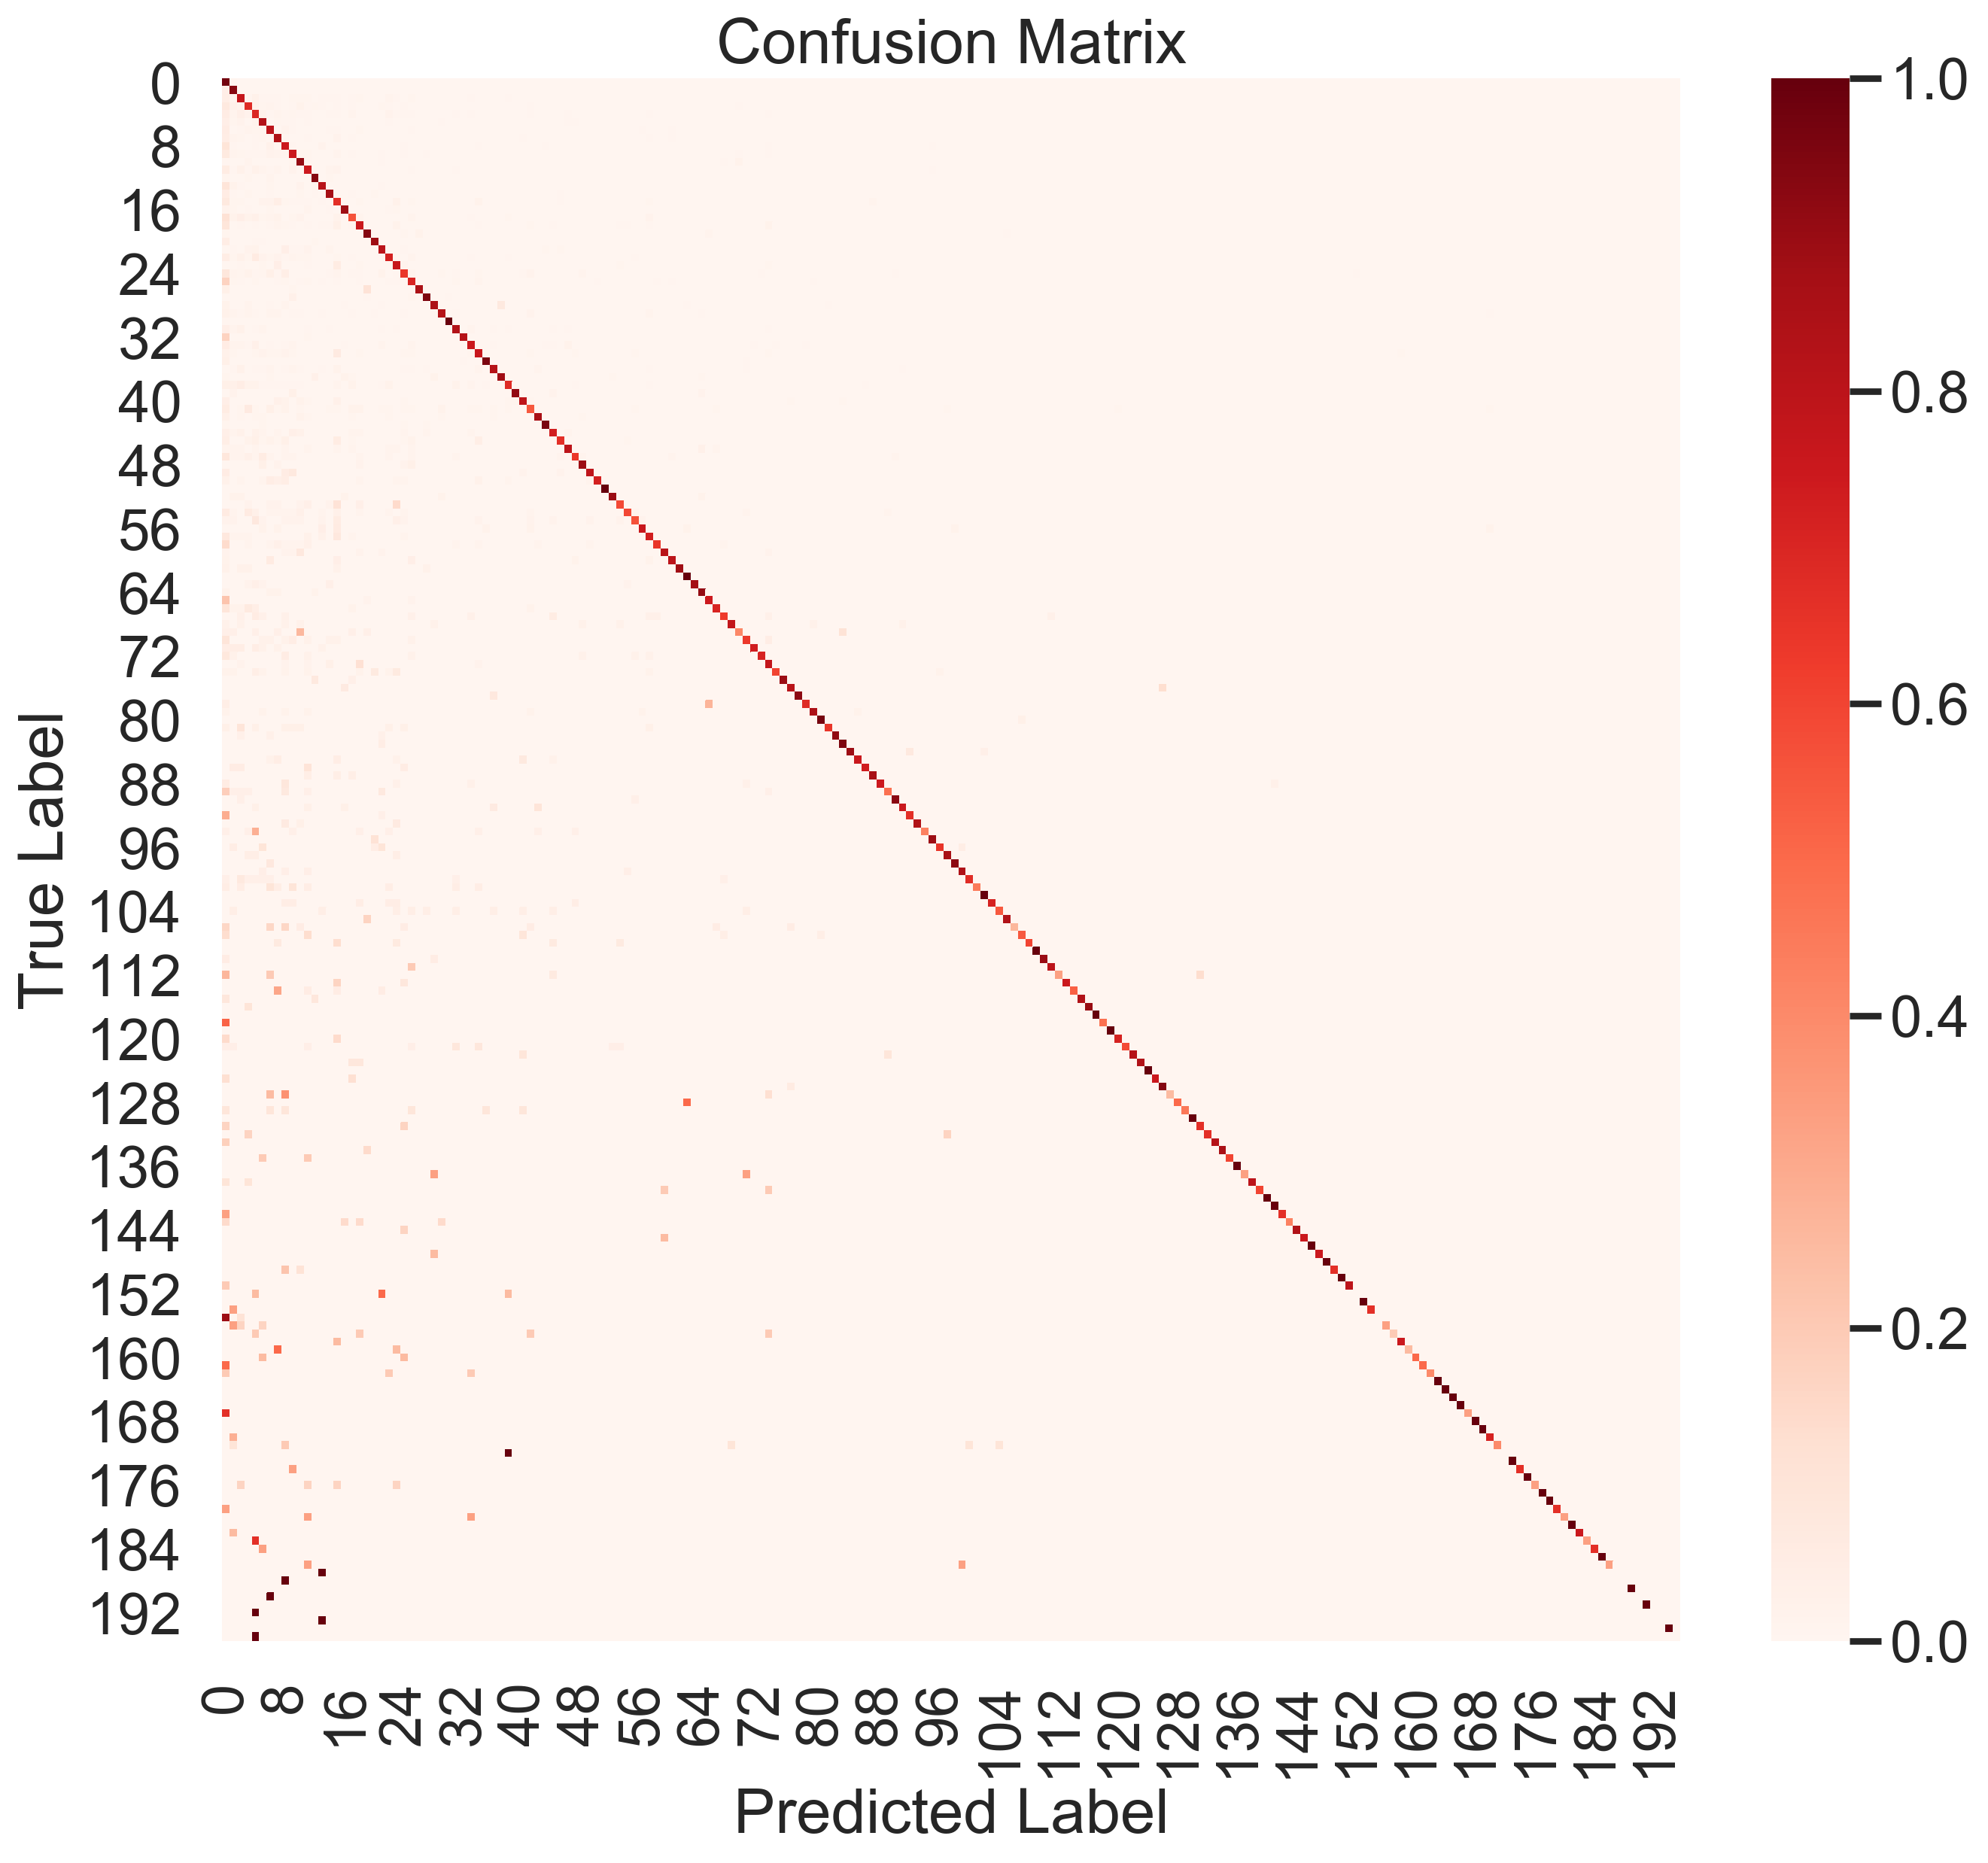

In [10]:
cm = confusion_matrix(ytest, ytest_pred, normalize='true')
sns.heatmap(cm, cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label");

In [11]:
classes = range(247)
test_index = len(ytest)

y_binarized = label_binarize(df.venuecat_encoded.values, classes=classes)
ytest_binarized = y_binarized[-test_index:]

ytest_probs = probs[-test_index:]

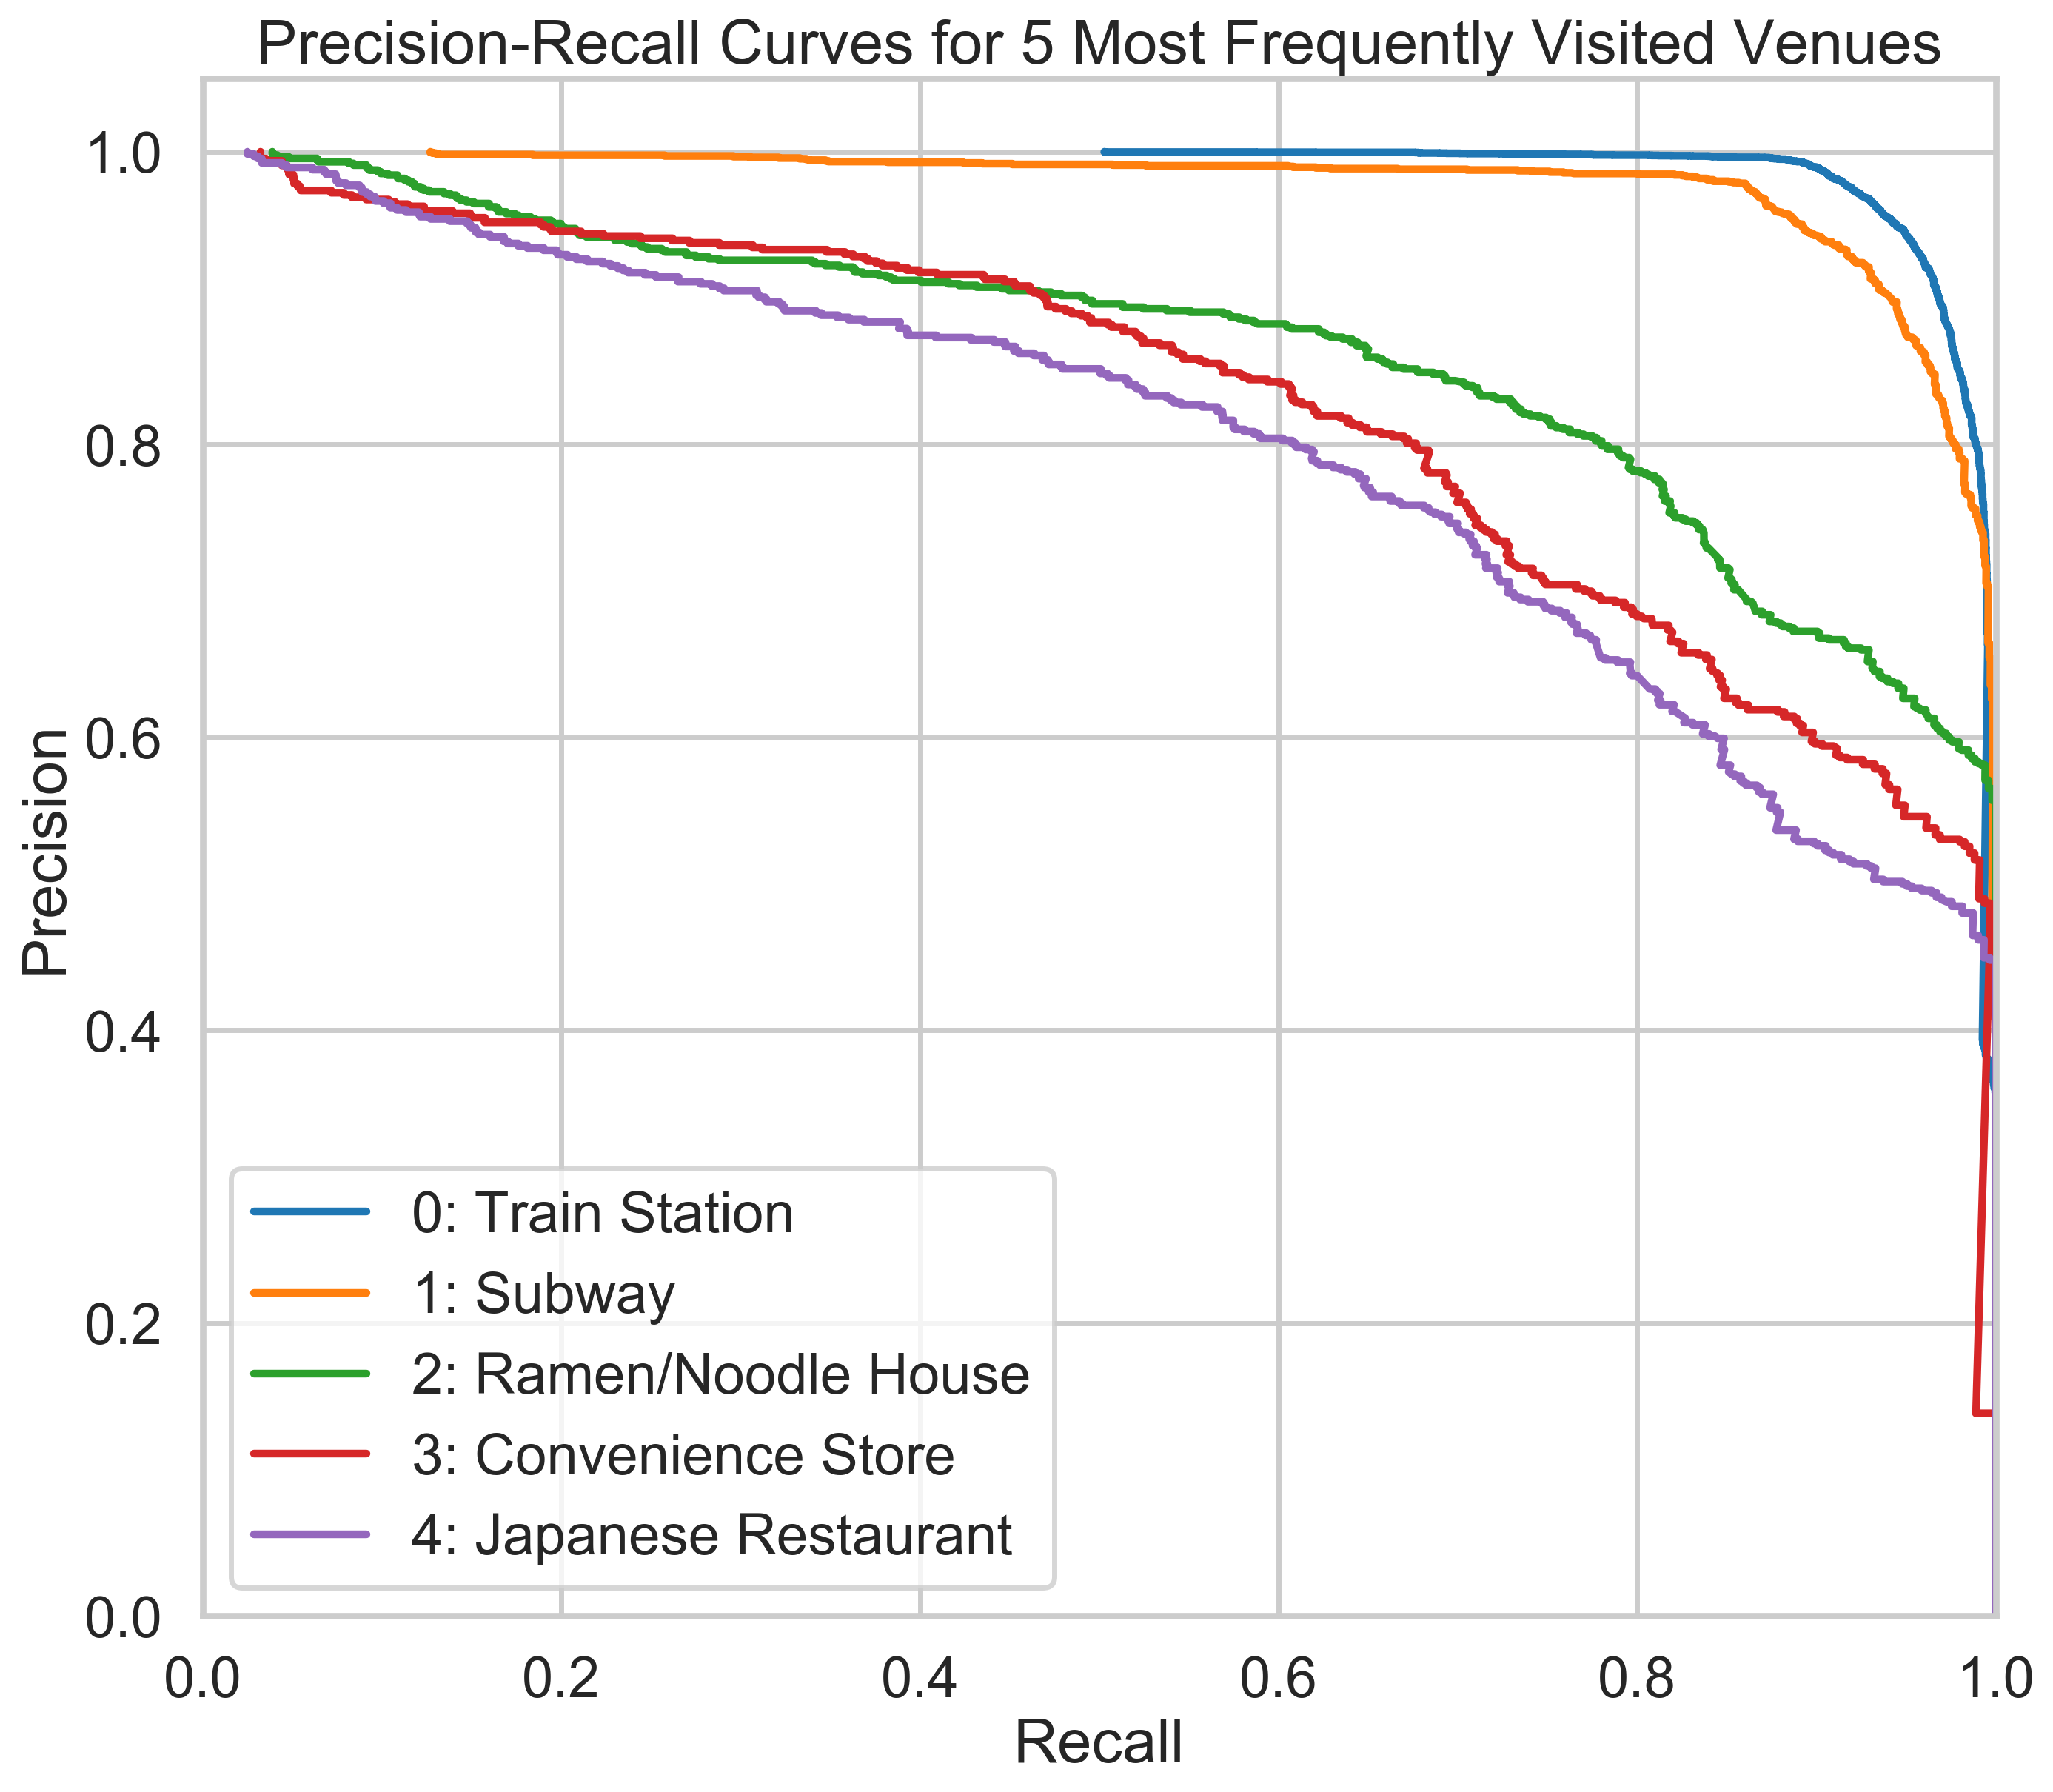

In [12]:
precision = dict()
recall = dict()

plt.figure()

for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(
        ytest_binarized[:, i], ytest_probs[:, i])
    plt.plot(precision[i], recall[i])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(["0: Train Station", "1: Subway", "2: Ramen/Noodle House",
            "3: Convenience Store", "4: Japanese Restaurant"])
plt.title("Precision-Recall Curves for 5 Most Frequently Visited Venues");